# Log-Linear Models

### A. General Concepts

* **Idea: ** 
    * Representing local structures (instead of having each feature to scope over all variables.
* **Formula Change: ** 
    * MN: $ \tilde{P} = \prod_i\phi_i(D_i) $
    * LogLin: $\tilde{P} = \prod_jexp\{-w_jf_j(D_j)\} = exp\{-\sum_jw_jf_j(D_j)\} $.
* **Scoping: **
    * Each feature $f_j$ has some scope $D_j$ (over a subset of all the variables involved).
    * Different features can have the same scope.

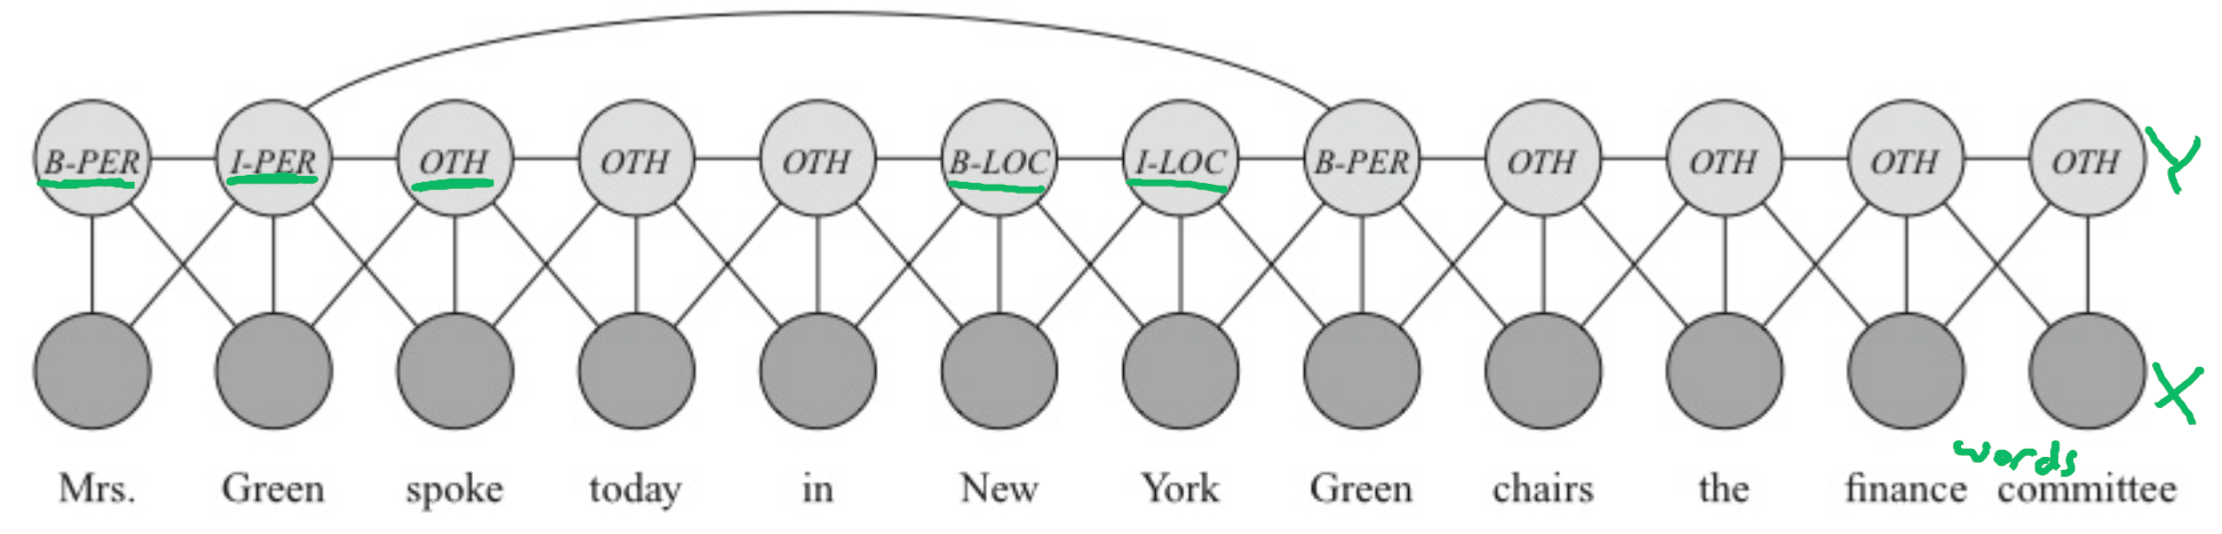

Fig 1. Applying Log-Linear Model in NLP


In [2]:
from IPython.display import Image, display
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/PGM/FIGS/log_linear_model_language.png",width="50%"))
print "Fig 1. Applying Log-Linear Model in NLP"

* **Feature Examples**
    * a. Language (Fig 1): $ f(Y_i,X_i) = 1\{Y_i=\mathtt{B-PER},X_i=\mathtt{capitalized}\} $
    * b. Ising Model (STAT): $ f_{i,j}(X_i,X_j) = X_i\cdot X_j, x_i\in\{-1,+1\} $ (each feature is the product of the rotation measures of neighboring electrons.)
    * c. Metric MRF (image segmentation): $ f_{i,j}(X_i,X_j) = \mu(X_i,X_j) $, where $\mu$ is a metric (reflexive, symmetrical, triangle inequality) or nonmetric (reflexive, symmetrical) distance measure. It's easy to see that, given the definition of feature, the more similar two variables are (i.e. small $f_{i,j}(X_i,X_j)$), the greater the magnitude measure will be (i.e. $exp\{-w_{ij}f_{i,j}(X_i,X_j)\} )$.

### B. Maxent Model: Concept

* **Example: POS Tagging**

    * a. Data & Tags
        * Data: $ X = \{ X_1: w_{-1} = \mathtt{to}; X_2: w_0 \mathtt{is\,lowercase}; X_3: w_0 \mathtt{ends\, with\,'d'}  \} $
        * Tags: $ Y = \{ Y_1: \mathtt{NN}; Y_2: \mathtt{VB}; Y_3: \mathtt{PREP} \} $

    * b. Feature: 
        * $ f_{ij}(X_i,Y_j) = 1(X_i=\mathtt{certain\,value},Y_j=\mathtt{certain\,value}) $

    * c. Example: $P(Y=2|X)$
        * $ P(Y=2|X,W) = sigmoid(w_1\cdot f_{12}(X_1,Y_2) + w_2\cdot f_{22}(X_2,Y_2) + w_3\cdot f_{32}(X_3,Y_2)) = \frac{exp\{\sum_iw_if(X_i,Y=2)\}}{\sum_j exp\{\sum_iw_if(X_i,Y=j)\}} $

    * d. Optimization: 
        * Idea: Knowing the correct label is 2, we optimize the model by finding the $W=i, i\in\{1,2,3\}$ that maximizes $P(Y=2|X)$.
        * Method: Maximizing the log-likelihood $log(P(Y|X,W))$.

* **Generalized Optimization for Log-Linear Models: MLE** (using $C$ to indicate "class", $D$ "data", $\lambda$ for "weights")

    * Optimization Goal: $logP(C|D,\lambda) = log\prod_{(c,d)\in(C,D)}P(c|d,\lambda) = \sum_{(c,d)\in(C,D)}logP(c|d,\lambda) = \sum_{(c,d)\in(C,D)} log\frac{exp\sum_i\lambda_if_i(c,d)}{\sum_{c'}exp\sum_i\lambda_if_i(c,d)}$
    * Breakdown:
        * $ logP(C|D,\lambda) = \sum_{(c,d)\in(C,D)} log\,exp\sum_i\lambda_if_i(c,d) - \sum_{(c,d)\in(C,D)}log\sum_{c'}exp\sum_i\lambda_if_i(c,d) $ 
        * $ \frac{\partial logP(C|D,\lambda)}{\partial \lambda}$ = $\sum_{(c,d)\in(C,D)}f_i(c,d) - \sum_{(c,d)\in(C,D)}\sum_{c'}P(c'|d,\lambda)f_i(c',d)$ = *Empirical count($f_i,c$)* - *Predicted count($f_i,c$)*
        * Set $ \frac{\partial logP(C|D,\lambda)}{\partial \lambda} = 0$, solve for $\lambda$.

* **Optimization for Maxent Model**
    
    * Goal 1 -- Make Least Amount of Assumption: Maximization of entropy $H(p) = E_p[log\frac{1}{p_x}] = -\sum_xp_xlogp_x$, where $1/p_x$ can be interpreted as "surprise".
    * Goal 2 -- Consider Info Provided by Data: Maximization of log-likelihood of data.
    * Tool: *Lagrange Multiplier* (omitted).

### C. Maxent Model Example: Name Gender Classification

In [37]:
import numpy as np
from nltk import classify, NaiveBayesClassifier, MaxentClassifier

In [8]:
# LOAD RAW DATA
from nltk.corpus import names
import random
names = [(name,'male') for name in names.words('male.txt')] + [(name,'female') for name in names.words('female.txt')]
random.shuffle(names)
print names[:5]

[(u'Everard', 'male'), (u'Dotti', 'female'), (u'Konstantin', 'male'), (u'Mattie', 'female'), (u'Quill', 'male')]


In [13]:
# DEFINING FEATURES
def gender_features(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features
print "Example: generated feature set for word 'Gary':"
print gender_features('Gary')

Example: generated feature set for word 'Gary':
{'count(u)': 0, 'has(d)': False, 'count(b)': 0, 'count(w)': 0, 'has(b)': False, 'count(l)': 0, 'count(q)': 0, 'count(n)': 0, 'has(j)': False, 'count(s)': 0, 'count(h)': 0, 'has(h)': False, 'has(y)': True, 'count(j)': 0, 'has(f)': False, 'has(o)': False, 'count(x)': 0, 'has(m)': False, 'count(z)': 0, 'has(k)': False, 'has(u)': False, 'count(d)': 0, 'has(s)': False, 'count(f)': 0, 'lastletter': 'y', 'has(q)': False, 'has(w)': False, 'has(e)': False, 'has(z)': False, 'count(t)': 0, 'count(c)': 0, 'has(c)': False, 'has(x)': False, 'count(v)': 0, 'count(m)': 0, 'has(a)': True, 'has(v)': False, 'count(p)': 0, 'count(o)': 0, 'has(i)': False, 'count(i)': 0, 'has(r)': True, 'has(g)': True, 'count(k)': 0, 'firstletter': 'g', 'count(y)': 1, 'has(n)': False, 'has(l)': False, 'count(e)': 0, 'has(t)': False, 'count(g)': 1, 'count(r)': 1, 'count(a)': 1, 'has(p)': False}


In [32]:
# GENERATE TRAINING & TESTING
featuresets = [(gender_features(name), gender) for (name, gender) in names]
split = len(featuresets)*.8 # train=6355; test=1589 (total=7944).
train, test = featuresets[:int(split)], featuresets[int(split):]

In [49]:
%%time
# NAIVE BAYES BASELINE
nb = NaiveBayesClassifier.train(train)
print "Accuracy: %.2f%%" % (classify.accuracy(nb, test)*100)
print "Classification Examples: "
print nb.classify(gender_features('Gary'))
print nb.classify(gender_features('Mary'))

Accuracy: 77.97%
Classification Examples: 
male
female
CPU times: user 573 ms, sys: 16.5 ms, total: 590 ms
Wall time: 579 ms


In [52]:
%%time
# MAXENT CLASSIFICATION
me = MaxentClassifier.train(train, trace=3, max_iter=100)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.372
             2          -0.61369        0.628
             3          -0.59977        0.628
             4          -0.58665        0.629
             5          -0.57431        0.636
             6          -0.56272        0.651
             7          -0.55184        0.669
             8          -0.54162        0.686
             9          -0.53204        0.702
            10          -0.52304        0.714
            11          -0.51458        0.724
            12          -0.50663        0.735
            13          -0.49916        0.742
            14          -0.49212        0.751
            15          -0.48548        0.753
            16          -0.47922        0.758
            17          -0.47330        0.759
            18          -0.46771        0.761
            19          -0.46241        0.765
 

In [54]:
print me.classify(gender_features('John'))
print me.classify(gender_features('Mary'))

male
female


# Knowledge Engineering

### A. Choosing a Model

* a. Template-based vs. Specific
    
    * Templated-based: small number of variable types (more about feature choice and engineering).
    * Specific: large number of unique variable types, each of which requires its own model.
    
* b. Directed vs. Undirected

    * Depends on the nature of data and task.

* c. Generative vs. Discriminative

    * Generative: "shifty tasks". generally generative models are easier to train.
    * Discriminative: particular prediction task with richly expressive features, we avoid dealing with correlations among variables.

* NB: also available options are Hybrid, Emsemble ...

### B. Tuning

* a. Structure
    
    * Causal vs. Noncausal Ordering

* b. Parameters

    * Zeros: only when things are definitionally impossible.
    * Orders of Magnitude
    * Relative Values
    
* c. Iterative Refinement

    * Model Testing
    * Sensitivity Analysis for Parameters (i.e. which params wreaks the most havoc)
    * Error Analysis (e.g. add features, or add dependencies)

* d. Special Topic: CPD

In [55]:
# +-----------+------------------+---------------+
# |           | Context-Specific |  Aggregating  |
# +-----------+------------------+---------------+
# | Discrete  |  tree-cpds       | sigmoid,      |
# |           |                  | noisy OR      |
# +-----------+------------------+---------------+
# |Continuous | regression tree  | linear        |
# |           | (threshold)      | guassian      |
# +-----------+------------------+---------------+